In [1]:
#全局变量
hub_token = open('/root/hub_token.txt').read().strip()
repo_id = 'lansinuote/cv.3.image_object_detection'
push_to_hub = True

In [2]:
from transformers import DetrFeatureExtractor
import PIL.Image

#数据预处理工具
feature_extractor = DetrFeatureExtractor.from_pretrained(
    'facebook/detr-resnet-50', max_size=107.9256 + 60.8841 * 0.2)

print(feature_extractor)

#试算
feature_extractor(
    images=[
        PIL.Image.new('RGB', (100, 100), 'white'),
        PIL.Image.new('RGB', (200, 100), 'white')
    ],
    annotations=[{
        'image_id':
        0,
        'annotations': [{
            'category_id': 0,
            'area': 1,
            'bbox': [1, 2, 3, 4],
        }, {
            'category_id': 0,
            'area': 1,
            'bbox': [1, 2, 3, 4],
        }]
    }, {
        'image_id':
        0,
        'annotations': [{
            'category_id': 0,
            'area': 1,
            'bbox': [1, 2, 3, 4],
        }]
    }],
    return_tensors='pt',
)

DetrFeatureExtractor {
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "DetrFeatureExtractor",
  "format": "coco_detection",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "DetrFeatureExtractor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 120.10242,
    "shortest_edge": 800
  }
}



/root/anaconda3/envs/pt39/lib/python3.9/site-packages/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
/root/anaconda3/envs/pt39/lib/python3.9/site-packages/transformers/models/detr/image_processing_detr.py:776: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(
/root/anaconda3/envs/pt39/lib/python3.9/site-packages/transformers/models/detr/image_processing_detr.py:882: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


{'pixel_values': tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400

In [3]:
from datasets import load_dataset, concatenate_datasets


def get_dataset():

    dataset = load_dataset(path='svhn', name='full_numbers')

    #合并
    dataset = concatenate_datasets(
        [dataset['train'], dataset['test'], dataset['extra']])

    #过滤
    def f(data):
        #统计得出的数据,std乘以一个系数以控制差异度
        w_mean = 107.9256
        w_std = 60.8841 * 0.2

        h_mean = 63.2230
        h_std = 32.3928 * 0.2

        r_mean = 1.8266
        r_std = 0.5134 * 0.4

        results = []
        for image in data['image']:
            w, h = image.size
            r = w / h

            if not w_mean - w_std <= w <= w_mean + w_std:
                results.append(False)
                continue

            if not h_mean - h_std <= h <= h_mean + h_std:
                results.append(False)
                continue

            if not r_mean - r_std <= r <= r_mean + r_std:
                results.append(False)
                continue

            results.append(True)

        return results

    dataset = dataset.filter(f, batched=True, num_proc=4, batch_size=1000)

    #重新切分
    dataset = dataset.train_test_split(test_size=0.01, seed=0)

    return dataset


if push_to_hub:
    dataset = get_dataset()
    dataset.push_to_hub(repo_id=repo_id, token=hub_token)

dataset, dataset['train'][0]

Found cached dataset svhn (/root/.cache/huggingface/datasets/svhn/full_numbers/1.0.0/8e83fcbe6f6078438cd826c7acd29e3de8ee7db44657b535f6d3453235529a31)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/svhn/full_numbers/1.0.0/8e83fcbe6f6078438cd826c7acd29e3de8ee7db44657b535f6d3453235529a31/cache-be201760addbee51_00000_of_00004.arrow


Loading cached processed dataset at /root/.cache/huggingface/datasets/svhn/full_numbers/1.0.0/8e83fcbe6f6078438cd826c7acd29e3de8ee7db44657b535f6d3453235529a31/cache-be201760addbee51_00001_of_00004.arrow


Loading cached processed dataset at /root/.cache/huggingface/datasets/svhn/full_numbers/1.0.0/8e83fcbe6f6078438cd826c7acd29e3de8ee7db44657b535f6d3453235529a31/cache-be201760addbee51_00002_of_00004.arrow


Loading cached processed dataset at /root/.cache/huggingface/datasets/svhn/full_numbers/1.0.0/8e83fcbe6f6078438cd826c7acd29e3de8ee7db44657b535f6d3453235529a31/cache-be201760addbee51_00003_of_00004.arrow
Loading cached split indices for dataset at /root/.cache/huggingface/datasets/svhn/full_numbers/1.0.0/8e83fcbe6f6078438cd826c7acd29e3de8ee7db44657b535f6d3453235529a31/cache-d76b10d8084d6aa8.arrow and /root/.cache/huggingface/datasets/svhn/full_numbers/1.0.0/8e83fcbe6f6078438cd826c7acd29e3de8ee7db44657b535f6d3453235529a31/cache-123c831939a42e27.arrow
Pushing split train to the Hub.


  0%|          | 0/7 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.


  0%|          | 0/1 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

(DatasetDict({
     train: Dataset({
         features: ['image', 'digits'],
         num_rows: 6646
     })
     test: Dataset({
         features: ['image', 'digits'],
         num_rows: 68
     })
 }),
 {'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=119x63>,
  'digits': {'bbox': [[16, 8, 28, 45], [41, 6, 23, 45], [68, 1, 24, 45]],
   'label': [7, 0, 0]}})

In [4]:
import torch


#数据整理函数
def collate_fn(data):
    images = [i['image'] for i in data]
    digits = [i['digits'] for i in data]

    #把数据格式转换成coco格式,这是个非常蛋疼的格式
    annotations = []
    for digit in digits:
        i = {'image_id': 1, 'annotations': []}
        for label, bbox in zip(digit['label'], digit['bbox']):
            i['annotations'].append({
                'category_id': label,
                'area': 1,
                'bbox': bbox
            })
        annotations.append(i)

    #编码
    data = feature_extractor(images=images,
                             annotations=annotations,
                             return_tensors='pt')

    for label in data['labels']:
        del label['image_id']
        del label['area']
        del label['iscrowd']

    return data


loader = torch.utils.data.DataLoader(
    dataset=dataset['train'],
    batch_size=8,
    collate_fn=collate_fn,
    shuffle=True,
    drop_last=True,
)

for i, data in enumerate(loader):
    break

print(len(loader)), data

830


/root/anaconda3/envs/pt39/lib/python3.9/site-packages/transformers/models/detr/image_processing_detr.py:882: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


(None,
 {'pixel_values': tensor([[[[ 0.4851,  0.4337,  0.3994,  ..., -1.3644, -1.3473, -1.3473],
           [ 0.4851,  0.4337,  0.4166,  ..., -1.3644, -1.3302, -1.3473],
           [ 0.4851,  0.4337,  0.4166,  ..., -1.3644, -1.3130, -1.3302],
           ...,
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
          [[ 0.3627,  0.3102,  0.2752,  ..., -1.2829, -1.2654, -1.2304],
           [ 0.3627,  0.3102,  0.2927,  ..., -1.2829, -1.2129, -1.2304],
           [ 0.3627,  0.3102,  0.2927,  ..., -1.2829, -1.1954, -1.2129],
           ...,
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
          [[ 0.4614,  0.4091,  0.4091,  ..., -0.9678, -0.9504,

In [5]:
from transformers import DetrForObjectDetection, DetrModel, PreTrainedModel, PretrainedConfig
from transformers.models.detr.modeling_detr import DetrLoss, DetrHungarianMatcher, DetrObjectDetectionOutput

#加载模型
#model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50',num_labels=10,ignore_mismatched_sizes=True)


#定义下游任务模型
class Model(PreTrainedModel):
    config_class = PretrainedConfig

    def __init__(self, config):
        super().__init__(config)
        self.pretrained = DetrModel.from_pretrained('facebook/detr-resnet-50')

        #分类网络,在物品数量上+1,因为多一个背景类
        self.fc_label = torch.nn.Linear(256, 11)

        #定位网络
        self.fc_bbox = torch.nn.Sequential(
            torch.nn.Linear(256, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 4),
            torch.nn.Sigmoid(),
        )

        #加载预训练模型的参数
        parameters = DetrForObjectDetection.from_pretrained(
            'facebook/detr-resnet-50',
            num_labels=10,
            ignore_mismatched_sizes=True)

        self.fc_label.load_state_dict(
            parameters.class_labels_classifier.state_dict())

        self.fc_bbox[0].load_state_dict(
            parameters.bbox_predictor.layers[0].state_dict())
        self.fc_bbox[2].load_state_dict(
            parameters.bbox_predictor.layers[1].state_dict())
        self.fc_bbox[4].load_state_dict(
            parameters.bbox_predictor.layers[2].state_dict())

        #Detr的loss函数
        self.criterion = DetrLoss(matcher=DetrHungarianMatcher(class_cost=1,
                                                               bbox_cost=5,
                                                               giou_cost=2),
                                  num_classes=10,
                                  eos_coef=0.1,
                                  losses=['labels', 'boxes', 'cardinality'])

    def forward(self, pixel_values, pixel_mask, labels=None):
        logits = self.pretrained(pixel_values=pixel_values,
                                 pixel_mask=pixel_mask)

        #[b, 100, 256]
        logits = logits.last_hidden_state

        #[b, 100, 256] -> [b, 100, 2]
        out_label = self.fc_label(logits)
        #[b, 100, 256] -> [b, 100, 4]
        out_bbox = self.fc_bbox(logits)

        loss = None
        if labels:
            #计算loss
            loss = self.criterion({
                'logits': out_label,
                'pred_boxes': out_bbox
            }, labels)

            #loss加权
            loss['loss_ce'] *= 1
            loss['loss_bbox'] *= 5
            loss['loss_giou'] *= 2

            #求和
            loss = sum(loss.values())

        #return {'loss': loss, 'logits': out_label, 'pred_boxes': out_bbox}
        #其实就是个数据的载体,没干什么特别的事情,因为后面有点操作,所以不能直接用字典
        return DetrObjectDetectionOutput(loss=loss,
                                         logits=out_label,
                                         pred_boxes=out_bbox)


model = Model(PretrainedConfig())

#统计参数量
print(sum(i.numel() for i in model.parameters()) / 10000)

with torch.no_grad():
    out = model(**data)

out['loss'], out.keys()

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrModel: ['bbox_predictor.layers.0.weight', 'class_labels_classifier.bias', 'bbox_predictor.layers.2.bias', 'bbox_predictor.layers.1.weight', 'bbox_predictor.layers.2.weight', 'class_labels_classifier.weight', 'bbox_predictor.layers.1.bias', 'bbox_predictor.layers.0.bias']
- This IS expected if you are initializing DetrModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized because the shapes did not match:
- 

4151.1631


(tensor(96.9642), odict_keys(['loss', 'logits', 'pred_boxes']))

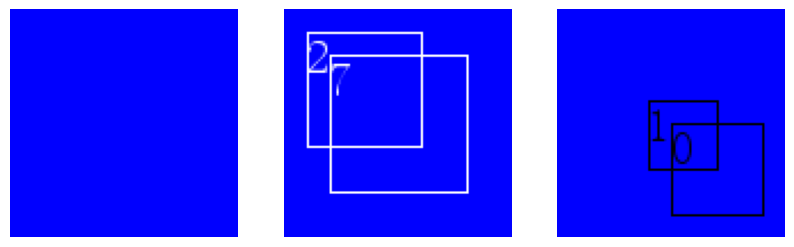

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
import PIL.ImageDraw
import PIL.ImageFont


def show(image, target, predict):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')

    copy = image.copy()
    draw = PIL.ImageDraw.Draw(copy)
    font = PIL.ImageFont.truetype('files/simsun.ttc', 20)

    for label, bbox in zip(target['label'], target['bbox']):
        bbox[2] += bbox[0]
        bbox[3] += bbox[1]
        draw.rectangle(xy=bbox, outline='white', width=1)
        draw.text(xy=bbox[:2], text=str(label), fill='white', font=font)

    plt.subplot(1, 3, 2)
    plt.imshow(copy)
    plt.axis('off')

    copy = image.copy()
    draw = PIL.ImageDraw.Draw(copy)

    for i in predict:
        draw.rectangle(xy=i['box'], outline='black', width=1)
        draw.text(xy=i['box'][:2],
                  text=str(i['label']),
                  fill='black',
                  font=font)

    plt.subplot(1, 3, 3)
    plt.imshow(copy)
    plt.axis('off')
    plt.show()


target = {'bbox': [[10, 10, 50, 50], [20, 20, 60, 60]], 'label': [2, 7]}

predict = [{
    'label': 0,
    'box': [50, 50, 90, 90]
}, {
    'label': 1,
    'box': [40, 40, 70, 70]
}]

show(PIL.Image.new('RGB', (100, 100), 'blue'), target, predict)

0


/root/anaconda3/envs/pt39/lib/python3.9/site-packages/transformers/models/detr/image_processing_detr.py:1262: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


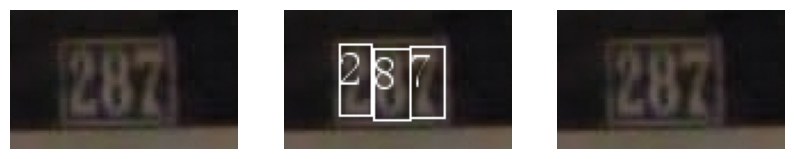

1


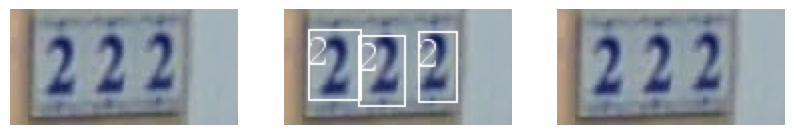

2


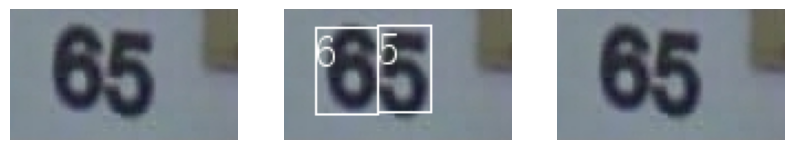

3


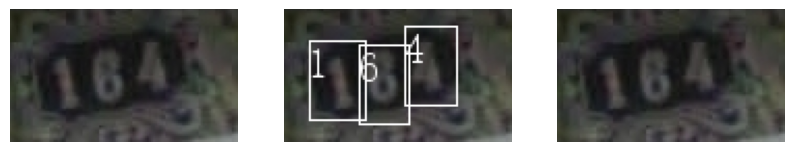

4


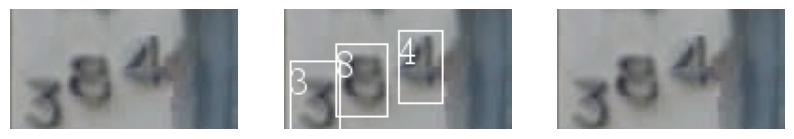

5


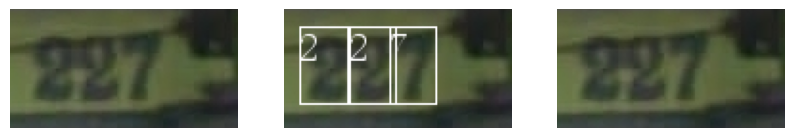

6


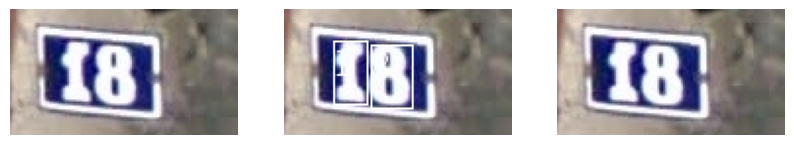

7


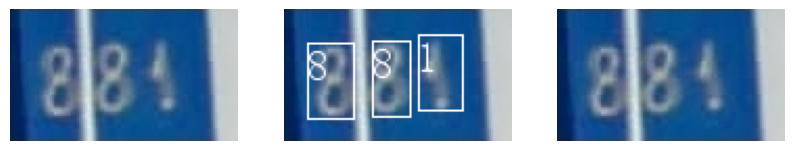

8


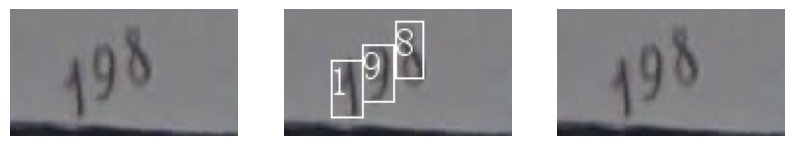

9


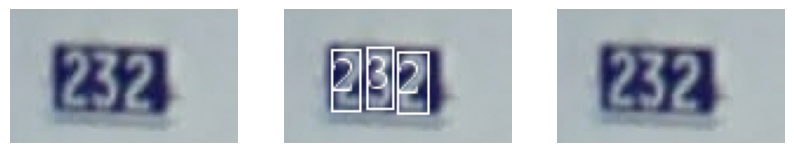

In [7]:
def test():
    dataset['test'] = dataset['test'].shuffle()

    for i in range(10):
        image = dataset['test'][i]['image']
        target = dataset['test'][i]['digits']

        data = feature_extractor(images=image, return_tensors='pt')
        with torch.no_grad():
            out = model(**data)

        #取出图片的原始尺寸,交换长和宽的位置
        target_sizes = torch.LongTensor([image.size[1],
                                         image.size[0]]).unsqueeze(dim=0)

        #把预测的结果缩放到原始图片的尺寸,并计算出分数和label
        out = feature_extractor.post_process(out, target_sizes=target_sizes)[0]

        predict = []
        for j in range(len(out['scores'])):
            if out['scores'][j] < 0.5:
                continue

            predict.append({
                'label': out['labels'][j].item(),
                'box': out['boxes'][j].tolist(),
            })

        print(i)
        show(image, target, predict)


test()

In [8]:
#dict_keys(['pixel_values', 'pixel_mask', 'labels'])

for k in data['labels'][0]:
    print(data['labels'][0][k].shape)

torch.Size([2])
torch.Size([2])
torch.Size([2, 4])
torch.Size([2])


In [9]:
from transformers import AdamW
from transformers.optimization import get_scheduler


#训练
def train():
    epochs = 150
    optimizer = AdamW(model.parameters(),
                      lr=2e-5,
                      betas=(0.9, 0.999),
                      eps=1e-8)
    scheduler = get_scheduler(name='linear',
                              num_warmup_steps=0,
                              num_training_steps=len(loader) * epochs,
                              optimizer=optimizer)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.train()
    model.to(device)
    for epoch in range(epochs):
        for i, data in enumerate(loader):
            #设备
            data['pixel_values'] = data['pixel_values'].to(device)
            data['pixel_mask'] = data['pixel_mask'].to(device)
            for label in data['labels']:
                for k in label.keys():
                    label[k] = label[k].to(device)

            out = model(**data)
            loss = out['loss']

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()
            scheduler.step()

            optimizer.zero_grad()
            model.zero_grad()

            if i % 200 == 0:
                lr = optimizer.state_dict()['param_groups'][0]['lr']
                print(epoch, i, loss.item(), lr)

    model.to('cpu')


if push_to_hub:
    train()
    model.push_to_hub(repo_id=repo_id, use_auth_token=hub_token)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/root/anaconda3/envs/pt39/lib/python3.9/site-packages/transformers/models/detr/image_processing_detr.py:882: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


0 0 90.27466583251953 1.999983935742972e-05
0 200 4.776616096496582 1.9967710843373497e-05
0 400 4.597393035888672 1.9935582329317272e-05
0 600 4.428405284881592 1.9903453815261048e-05
0 800 4.322719097137451 1.987132530120482e-05
1 0 5.062329292297363 1.9866506024096387e-05
1 200 4.718945026397705 1.9834377510040162e-05
1 400 4.517862319946289 1.9802248995983938e-05
1 600 4.872025012969971 1.9770120481927714e-05
1 800 5.349687099456787 1.973799196787149e-05
2 0 3.8687024116516113 1.9733172690763052e-05
2 200 5.0819830894470215 1.9701044176706828e-05
2 400 4.681674480438232 1.9668915662650604e-05
2 600 4.281737327575684 1.963678714859438e-05
2 800 4.803215026855469 1.9604658634538155e-05
3 0 4.637639045715332 1.959983935742972e-05
3 200 5.021700859069824 1.9567710843373494e-05
3 400 5.010661602020264 1.953558232931727e-05
3 600 4.3910112380981445 1.9503453815261045e-05
3 800 4.597631454467773 1.947132530120482e-05
4 0 4.884944915771484 1.9466506024096387e-05
4 200 4.536035060882568 1.9

34 600 1.1945915222167969 1.537012048192771e-05
34 800 1.2163355350494385 1.5337991967871487e-05
35 0 1.362973690032959 1.5333172690763054e-05
35 200 1.563148021697998 1.530104417670683e-05
35 400 1.0964314937591553 1.52689156626506e-05
35 600 1.0793557167053223 1.5236787148594379e-05
35 800 1.689732313156128 1.5204658634538155e-05
36 0 1.1445415019989014 1.519983935742972e-05
36 200 0.8975435495376587 1.5167710843373495e-05
36 400 1.364545464515686 1.513558232931727e-05
36 600 1.0326206684112549 1.5103453815261045e-05
36 800 1.0931886434555054 1.507132530120482e-05
37 0 1.0275754928588867 1.5066506024096388e-05
37 200 1.049043893814087 1.503437751004016e-05
37 400 0.8935149312019348 1.5002248995983936e-05
37 600 0.969188928604126 1.4970120481927712e-05
37 800 0.6808429956436157 1.4937991967871488e-05
38 0 0.7655022144317627 1.4933172690763054e-05
38 200 1.2449212074279785 1.490104417670683e-05
38 400 1.053990125656128 1.4868915662650602e-05
38 600 1.3577187061309814 1.4836787148594378

68 600 1.3026328086853027 1.0836787148594379e-05
68 800 0.7284384965896606 1.0804658634538154e-05
69 0 1.1780716180801392 1.079983935742972e-05
69 200 0.7436489462852478 1.0767710843373495e-05
69 400 0.4879835546016693 1.0735582329317269e-05
69 600 1.1567237377166748 1.0703453815261044e-05
69 800 0.8913705945014954 1.067132530120482e-05
70 0 1.2765730619430542 1.0666506024096387e-05
70 200 0.3862479329109192 1.0634377510040162e-05
70 400 0.5874103903770447 1.0602248995983936e-05
70 600 0.9968411326408386 1.0570120481927712e-05
70 800 0.7795333862304688 1.0537991967871486e-05
71 0 0.6156572103500366 1.0533172690763054e-05
71 200 0.40170782804489136 1.0501044176706828e-05
71 400 0.6237999796867371 1.0468915662650604e-05
71 600 0.53631591796875 1.0436787148594378e-05
71 800 0.46579116582870483 1.0404658634538153e-05
72 0 0.4302661120891571 1.039983935742972e-05
72 200 0.35127055644989014 1.0367710843373495e-05
72 400 0.9980992078781128 1.0335582329317271e-05
72 600 0.7128406763076782 1.03

103 0 0.28361281752586365 6.266506024096386e-06
103 200 0.6567510366439819 6.234377510040161e-06
103 400 0.6647939682006836 6.202248995983936e-06
103 600 0.2903406620025635 6.170120481927712e-06
103 800 0.5550869107246399 6.1379919678714865e-06
104 0 0.7798963785171509 6.133172690763053e-06
104 200 0.30253294110298157 6.101044176706828e-06
104 400 0.2461189180612564 6.068915662650603e-06
104 600 0.5035692453384399 6.036787148594378e-06
104 800 0.46927410364151 6.004658634538153e-06
105 0 0.20275336503982544 5.999839357429719e-06
105 200 0.606906533241272 5.967710843373494e-06
105 400 0.3421385884284973 5.93558232931727e-06
105 600 0.5056416988372803 5.903453815261045e-06
105 800 0.2567356824874878 5.8713253012048195e-06
106 0 0.8535351753234863 5.866506024096386e-06
106 200 0.2763126492500305 5.834377510040162e-06
106 400 0.634101390838623 5.802248995983936e-06
106 600 0.2836564779281616 5.770120481927711e-06
106 800 0.41973069310188293 5.737991967871487e-06
107 0 0.4137030839920044 5.

136 400 0.31729623675346375 1.802248995983936e-06
136 600 0.17717261612415314 1.770120481927711e-06
136 800 0.4261988699436188 1.737991967871486e-06
137 0 0.27500954270362854 1.7331726907630522e-06
137 200 0.8031269907951355 1.7010441767068274e-06
137 400 0.4181287884712219 1.6689156626506025e-06
137 600 0.18157723546028137 1.6367871485943775e-06
137 800 0.5272864103317261 1.6046586345381526e-06
138 0 0.18676939606666565 1.5998393574297191e-06
138 200 0.23771405220031738 1.5677108433734942e-06
138 400 0.19926056265830994 1.5355823293172692e-06
138 600 0.47978562116622925 1.5034538152610443e-06
138 800 0.6935129165649414 1.4713253012048195e-06
139 0 0.3450060188770294 1.4665060240963857e-06
139 200 0.689215362071991 1.4343775100401607e-06
139 400 0.3967198133468628 1.4022489959839358e-06
139 600 0.22025814652442932 1.3701204819277108e-06
139 800 0.3680647909641266 1.337991967871486e-06
140 0 0.23841552436351776 1.3331726907630524e-06
140 200 0.41295990347862244 1.3010441767068275e-06
14

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrModel: ['bbox_predictor.layers.0.weight', 'class_labels_classifier.bias', 'bbox_predictor.layers.2.bias', 'bbox_predictor.layers.1.weight', 'bbox_predictor.layers.2.weight', 'class_labels_classifier.weight', 'bbox_predictor.layers.1.bias', 'bbox_predictor.layers.0.bias']
- This IS expected if you are initializing DetrModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized because the shapes did not match:
- 

0


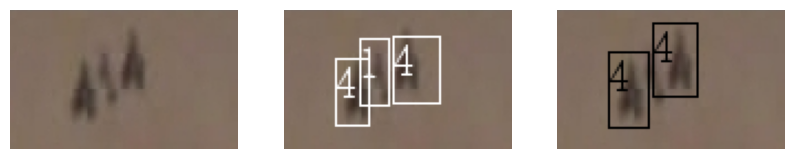

1


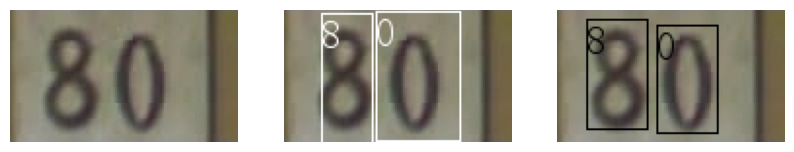

2


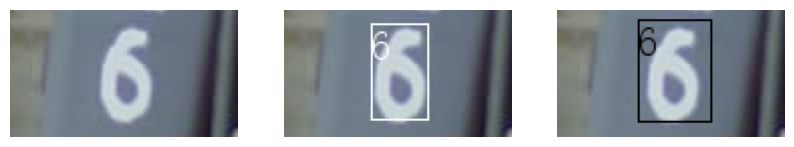

3


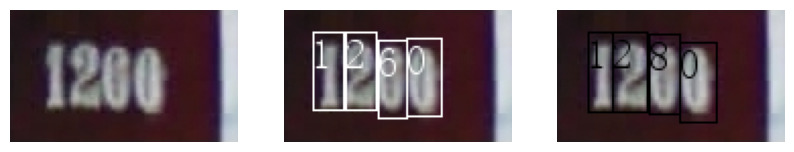

4


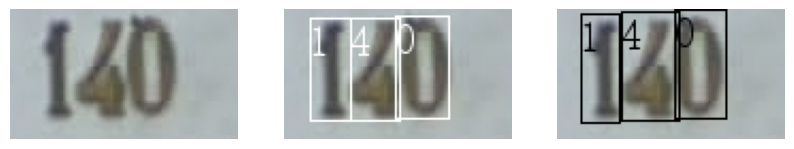

5


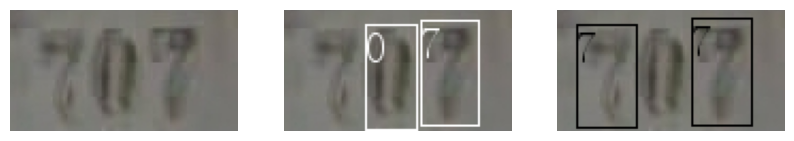

6


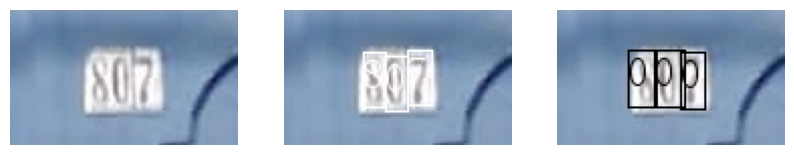

7


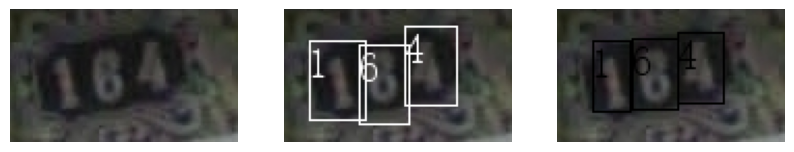

8


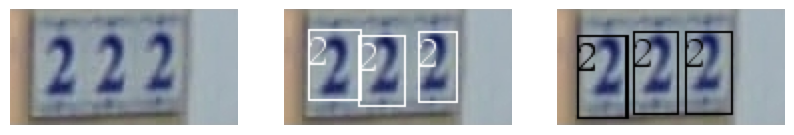

9


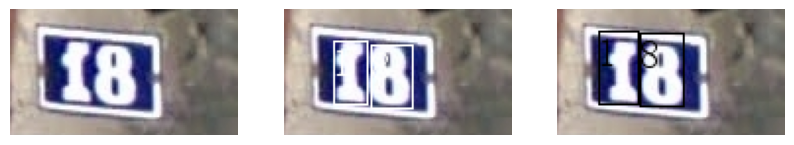

In [10]:
#直接使用我训练好的模型
model = Model.from_pretrained(repo_id)
test()